In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [6]:
#Carregando dataset
wine = pd.read_csv('winequality-red.csv')

In [7]:
#Verificando a distribuição dos dados
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#informações sobre as colunas dos dados
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


Fazendo algumas plotagens para ver como as colunas de dados são distribuidas no conjunto de dados
=============================================================================

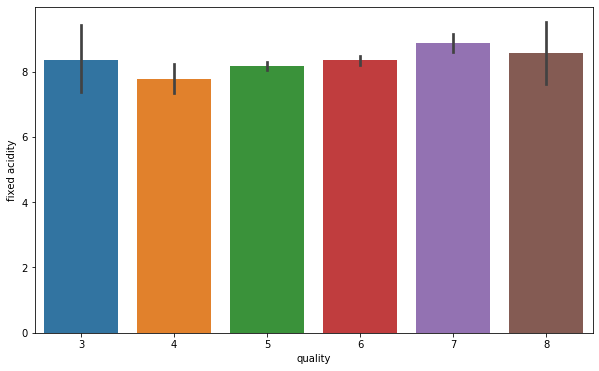

In [10]:
# Acidez fiz não fornece nenhuma especificação para classificar a qualidade
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

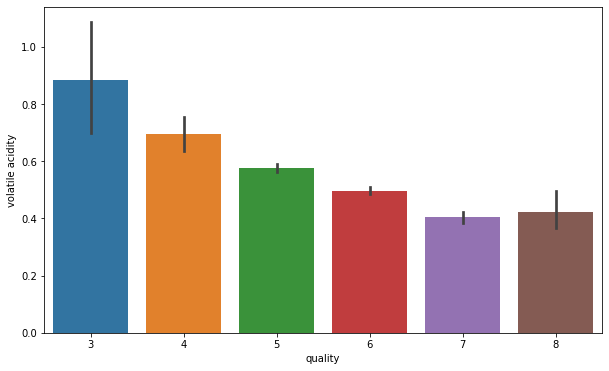

In [11]:
#Tendência decrescente de acidez volatil a medida que aumentamos a qualidade
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

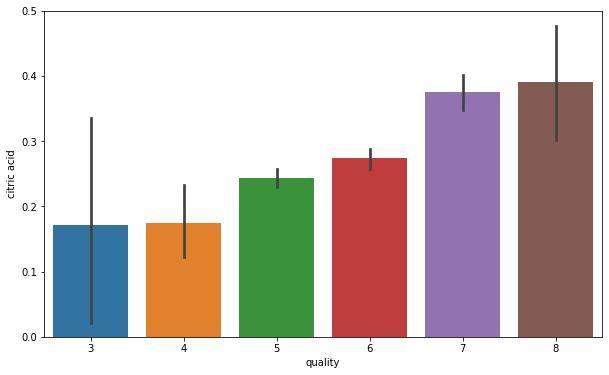

In [13]:
#Composição de ácido cítrico aumenta à medida que aumentamos a qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

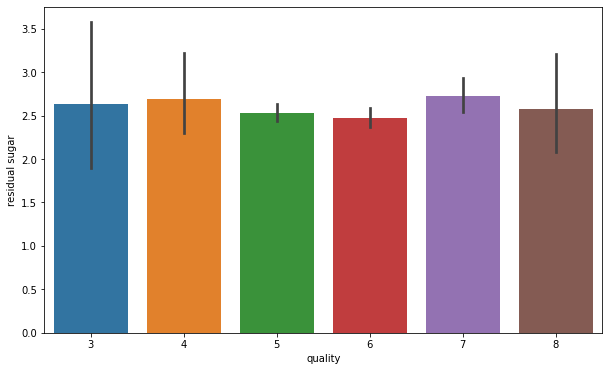

In [14]:
#Não fornece nenhuma especificação para a qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

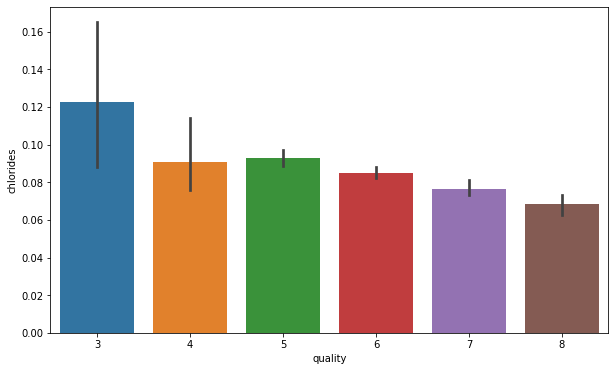

In [15]:
#A composição do cloreto também diminui à medida que aumentamos a qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

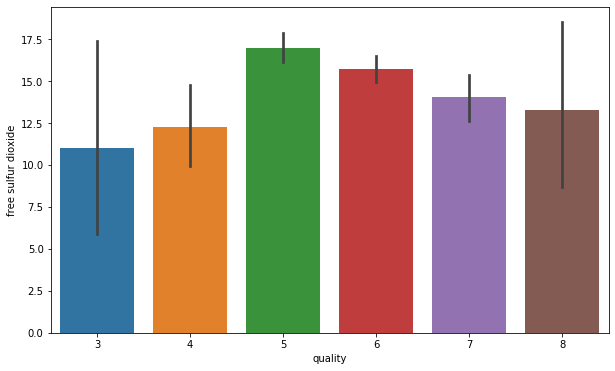

In [16]:
#Não fornece nenhuma especificação para definir a qualidade do vinho baseado no dióxido de enxofre livre    
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

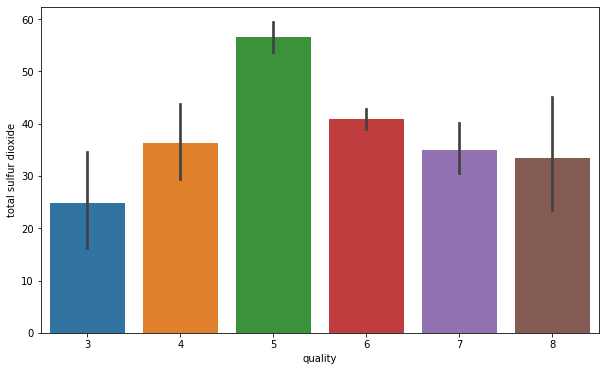

In [17]:
#Não fornece nenhuma especificação para definir a qualidade do vinho baseado no dióxido de enxofre total
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

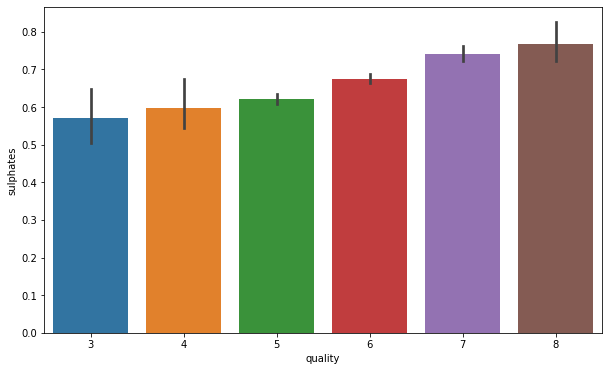

In [18]:
#O nível de sulfatos aumenta com a qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

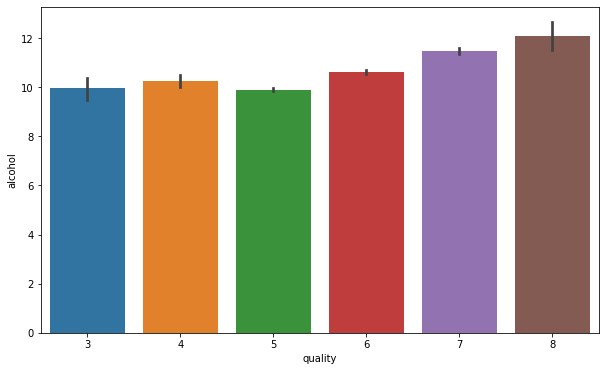

In [19]:
#O nível de álcool também aumenta à medida que a qualidade do vinho aumenta
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

pre-processamento dos dados para executar algoritmos de aprendizado de máquina
==============================================================================

In [20]:
#Fazendo classificação binária para a variável de resposta.
#Dividindo o vinho como bom e ruim, dando o limite para a qualidade
bins = (2, 6.5, 8)
group_names = ['ruim', 'bom']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [23]:
#atribuindo rótulos à variável de qualidade
label_quality = LabelEncoder()

In [ ]:
#ruim se torna 0 e bom se torna 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine['quality'].value_counts()

ruim    1382
bom      217
Name: quality, dtype: int64

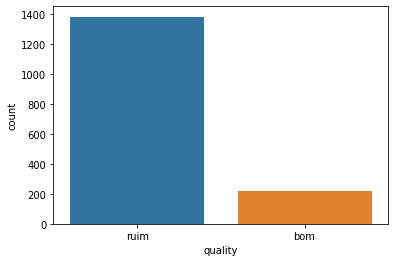

In [25]:
sns.countplot(wine['quality'])

In [30]:
#Separando o conjunto de dados como variavel de resposta e variavel de recurso
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [31]:
#Dividindo os dados para treino e para teste  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
#Aplicando o dimensionamento padrão para obter um resultado otimizado
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Os dados estão prontos para aplicar um algoritmo de aprendizagem de maquina
===========================================================================

Random forest classifier
========================

In [45]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [51]:
#visualizando os resultados do algoritmo
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         bom       0.70      0.40      0.51        47
        ruim       0.90      0.97      0.94       273

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [52]:
#Floresta aleatória dá a precisão de 89%
#Matriz de confusão para a classificação aleatória de florestas
print(confusion_matrix(y_test, pred_rfc))

[[ 19  28]
 [  8 265]]


Stochastic Gradient Decent Classifier
=====================================

In [53]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [54]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

         bom       0.55      0.49      0.52        47
        ruim       0.91      0.93      0.92       273

    accuracy                           0.87       320
   macro avg       0.73      0.71      0.72       320
weighted avg       0.86      0.87      0.86       320



In [55]:
#87% de precisão usando stochastic gradient descent classifier
print(confusion_matrix(y_test, pred_sgd))

[[ 23  24]
 [ 19 254]]


Support Vector Classifier
=========================

In [56]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [57]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

         bom       0.71      0.26      0.37        47
        ruim       0.88      0.98      0.93       273

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [ ]:
#Support vector classifier consegue uma precisão de 88%

Tentativa de melhorar a precisão dos modelos
============================================

Grid Search CV
==============

In [58]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [59]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
#Melhores parâmetros para o nosso modelo svc
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [61]:
#executando o nosso SVC novamente com os parâmetros melhorados.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

         bom       0.89      0.34      0.49        47
        ruim       0.90      0.99      0.94       273

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



O SVC melhora de 88% para 90% usando o Grid Search CV


Pontuação de validação cruzada para floresta aleatória e SGD
================================================

In [62]:
#tentar fazer alguma avaliação para o modelo de floresta aleatória usando validação cruzada.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9116633858267716

Precisão da floresta aleatoria aumenta de 89% para 91% usando pontuação de validação cruzada
